In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob2 import glob
import dask.array

# from xarray.backends import dask_manager
# from xarray.backends import set_options
# set_options(chunk_manager=dask_manager)

In [2]:
swot_files = sorted(glob('./SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/*.nc'))
swot_files[10:20]

['./SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_006_022_20111118T170604_20111118T175710_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_006_026_20111118T203027_20111118T212132_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_007_002_20111118T235448_20111119T004554_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_007_012_20111119T082546_20111119T091650_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_007_015_20111119T105902_20111119T115007_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_008_021_20111120T155613_20111120T164718_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_008_025_20111120T192035_20111120T201141_DG10_01.nc',
 './SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_009_001_20111

In [3]:
swot_ds = xr.open_mfdataset(swot_files[10:22], combine='nested', concat_dim = 'num_lines') # , engine='store', chunks={'time': 10})
swot_ds

<xarray.Dataset>
Dimensions:                                (num_lines: 118402, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/92)
    time                                   (num_lines) datetime64[ns] dask.array<chunksize=(9868,), meta=np.ndarray>
    time_tai                               (num_lines) datetime64[ns] dask.array<chunksize=(9868,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssh_karin_2                            (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ...                                     ...
    simulated_error_karin                  (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_roll                   (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_phase                  (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_timing                 (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_orbital                (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_troposphere            (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-23 07:47:28Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       67.57445067787674
    right_last_latitude:        -78.29237200613302
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.0033528106647474805

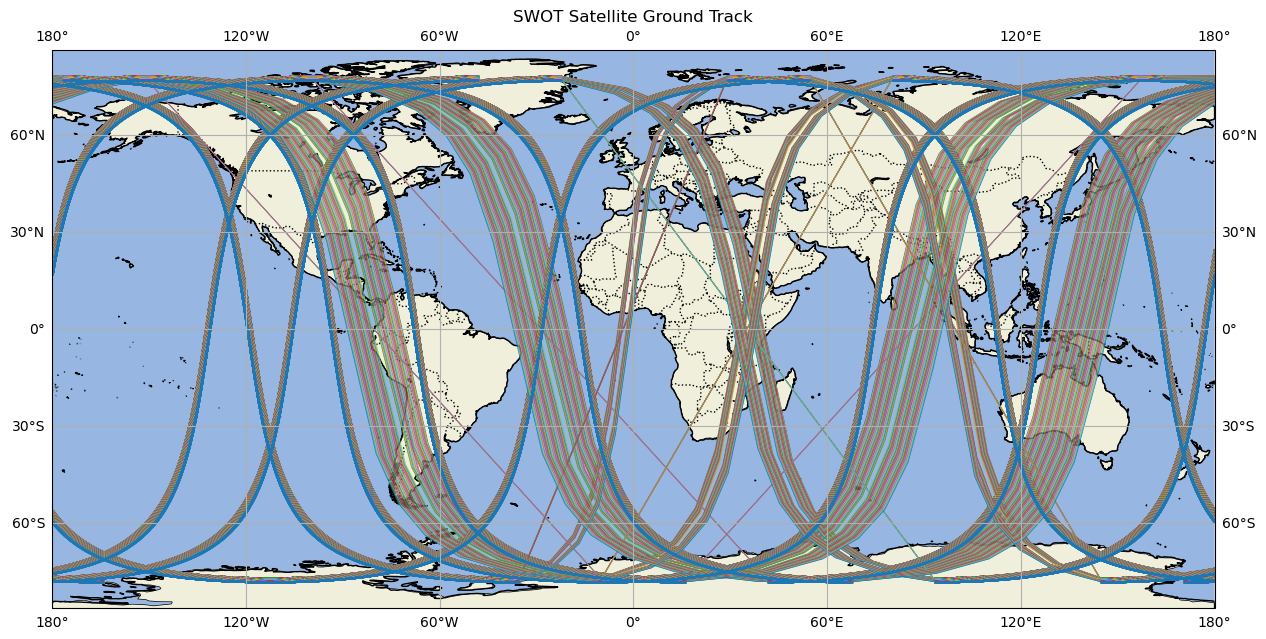

In [4]:
# Assuming swot_ds is your dataset
# Extract the nadir position for the ground track
latitude = swot_ds['latitude_nadir'].values
longitude = swot_ds['longitude_nadir'].values
latitude = swot_ds['latitude'].values
longitude = swot_ds['longitude'].values

# Create the map plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is one of the simplest projections for geographic data.
ax.plot(longitude, latitude, '.-', markersize=1, linewidth=0.5, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')  # '10m', '50m', and '110m' are the options for resolution. '10m' is the highest.
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.gridlines(draw_labels=True)
plt.title('SWOT Satellite Ground Track')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming swot_ds is your dataset
# Extract the nadir position for the ground track
latitude_nadir = swot_ds['latitude_nadir'].values
longitude_nadir = swot_ds['longitude_nadir'].values
latitude = swot_ds['latitude'].values
longitude = swot_ds['longitude'].values

# Create the map plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is one of the simplest projections for geographic data.

# Set extent for the California Current region
ax.set_extent([-165, -115, 25, 50])

ax.plot(longitude, latitude, '.-', markersize=1, linewidth=0.5, transform=ccrs.Geodetic())
ax.plot(longitude_nadir, latitude_nadir, '.-', markersize=1, linewidth=0.5, transform=ccrs.Geodetic(), color='blue')

ax.coastlines(resolution='50m')  # '10m', '50m', and '110m' are the options for resolution. '10m' is the highest.
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.gridlines(draw_labels=True)
plt.title('SWOT Satellite Ground Track Focused on California Current Region')

plt.show()
plt.savefig('SWOT_Satellite_Ground_Track_CCS.png', dpi = 300)

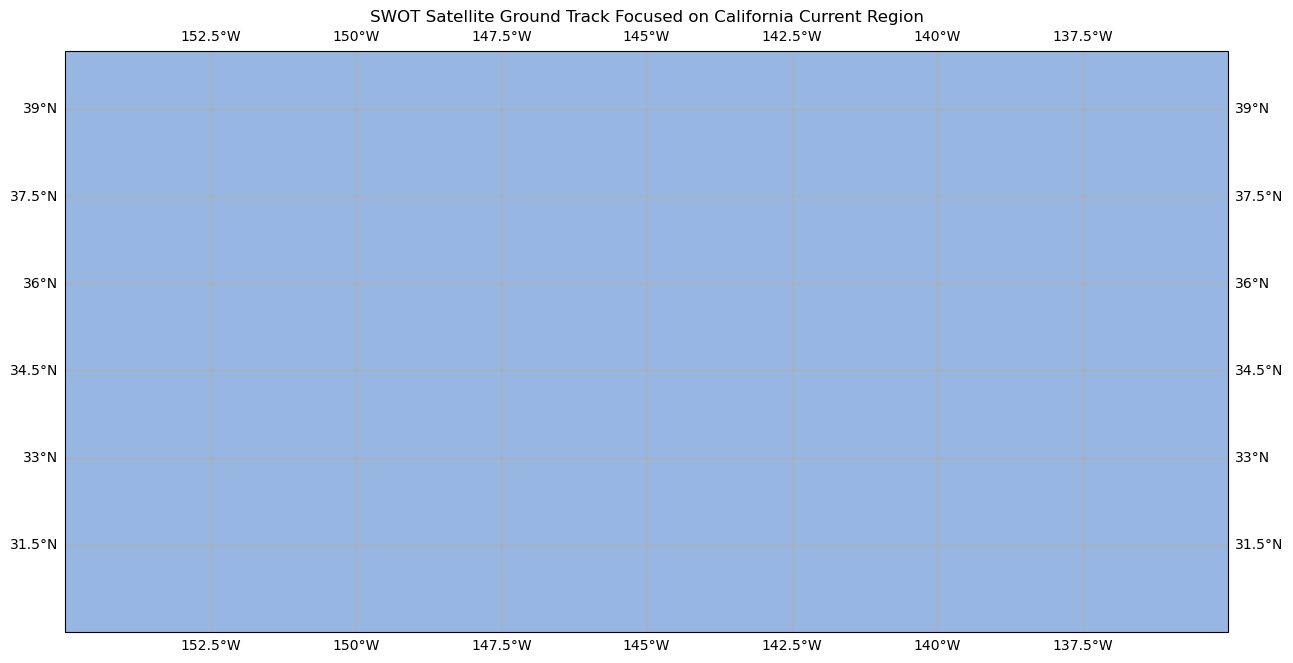

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming swot_ds is your dataset
# Extract the nadir position for the ground track
latitude_nadir = swot_ds['latitude_nadir'].values
longitude_nadir = swot_ds['longitude_nadir'].values
latitude = swot_ds['latitude'].values
longitude = swot_ds['longitude'].values

# Create the map plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is one of the simplest projections for geographic data.

# Set extent for the California Current region
ax.set_extent([-155, -135, 30, 40])

ax.plot(longitude, latitude, '.-', markersize=1, linewidth=0.5, transform=ccrs.Geodetic())
ax.plot(longitude_nadir, latitude_nadir, '.-', markersize=1, linewidth=0.5, transform=ccrs.Geodetic(), color='blue')

ax.coastlines(resolution='50m')  # '10m', '50m', and '110m' are the options for resolution. '10m' is the highest.
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.gridlines(draw_labels=True)
plt.title('SWOT Satellite Ground Track Focused on California Current Region')

plt.show()


In [7]:
latitude_nadir , longitude_nadir 

(array([77.662503, 77.66247 , 77.662412, ..., 77.663153, 77.663181,
        77.663183]),
 array([260.439412, 260.52359 , 260.607768, ..., 311.732881, 311.817064,
        311.901247]))

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def sample_aviso_on_swot_track(aviso_path, swot_longitude, swot_latitude, buffer_distance=None):
    # 1. Open AVISO dataset
    aviso_ds = xr.open_dataset(aviso_path)
    
    # 2. Interpolate AVISO data to the ground track coordinates
    sampled_aviso = aviso_ds.interp(longitude=('track_dim', swot_longitude), latitude=('track_dim', swot_latitude))
    
    # Optional: Create a swath if buffer_distance is provided
    if buffer_distance:
        # Create a LineString from the SWOT track
        line = LineString(zip(swot_longitude, swot_latitude))
        
        # Buffer the LineString to create a swath
        swath_polygon = line.buffer(buffer_distance)
        
        # Mask AVISO data outside of the swath
        # Convert AVISO lon/lat to a 2D meshgrid
        lon, lat = np.meshgrid(aviso_ds.longitude.values, aviso_ds.latitude.values)
        mask = np.vectorize(swath_polygon.contains)(lon, lat)
        
        # Assuming 'some_variable' is what you want to sample
        variable_data = aviso_ds['some_variable'].values
        variable_data[~mask] = np.nan  # set data outside of the swath to NaN
    
    # 3. Visualize the sampled data (assuming the variable's name is 'some_variable')
    plt.figure(figsize=(12, 6))
    plt.plot(sampled_aviso['some_variable'].values)
    plt.title('Sampled AVISO Data Along SWOT Ground Track')
    plt.xlabel('Track Index')
    plt.ylabel('Variable Value')
    plt.grid(True)
    plt.show()

# Example Usage:
# sample_aviso_on_swot_track('path_to_aviso_data.nc', swot_longitude, swot_latitude, buffer_distance=0.1)


In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def sample_aviso_on_swot_track(aviso_path, swot_longitude, swot_latitude, buffer_distance=None):
    # 1. Open AVISO dataset    
    # Determine correct coordinate names for AVISO dataset
    lon_coord = 'longitude' if 'longitude' in aviso_ds.coords else 'x'
    lat_coord = 'latitude' if 'latitude' in aviso_ds.coords else 'y'
    
    # 2. Interpolate AVISO data to the ground track coordinates
    sampled_aviso = aviso_ds.interp({lon_coord: ('track_dim', swot_longitude), lat_coord: ('track_dim', swot_latitude)})
    
    # Optional: Create a swath if buffer_distance is provided
    if buffer_distance:
        # Create a LineString from the SWOT track
        line = LineString(zip(swot_longitude, swot_latitude))
        
        # Buffer the LineString to create a swath
        swath_polygon = line.buffer(buffer_distance)
        
        # Mask AVISO data outside of the swath
        # Convert AVISO lon/lat to a 2D meshgrid
        lon, lat = np.meshgrid(aviso_ds[lon_coord].values, aviso_ds[lat_coord].values)
        mask = np.vectorize(swath_polygon.contains)(lon, lat)
        
        # Assuming 'some_variable' is what you want to sample
        variable_data = aviso_ds['some_variable'].values
        variable_data[~mask] = np.nan  # set data outside of the swath to NaN
    
    # 3. Visualize the sampled data (assuming the variable's name is 'some_variable')
    plt.figure(figsize=(12, 6))
    plt.plot(sampled_aviso['some_variable'].values)
    plt.title('Sampled AVISO Data Along SWOT Ground Track')
    plt.xlabel('Track Index')
    plt.ylabel('Variable Value')
    plt.grid(True)
    plt.show()

# Example Usage:
# sample_aviso_on_swot_track('path_to_aviso_data.nc', swot_longitude, swot_latitude, buffer_distance=0.1)



In [12]:
aviso_path = './aviso_msla_ccs_1d.nc'

aviso_ds = xr.open_dataset(aviso_path)
aviso_ssh = aviso_ds.msla[:, :, 0]
lon, lat = aviso_ds.lon, aviso_ds.lat

In [13]:
aviso_ssh, aviso_ds.lon, aviso_ds.lat

(<xarray.DataArray 'msla' (y: 104, x: 184)>
 [19136 values with dtype=float64]
 Dimensions without coordinates: y, x,
 <xarray.DataArray 'lon' (x: 184)>
 [184 values with dtype=float64]
 Dimensions without coordinates: x,
 <xarray.DataArray 'lat' (y: 104)>
 [104 values with dtype=float64]
 Dimensions without coordinates: y)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def sample_msla_on_swot_track(msla, lon, lat, swot_longitude, swot_latitude):
    
    # Ensure the msla data's coordinates are in ascending order
    msla = msla.sortby('x').sortby('y')
    
    # Extract the lon and lat coordinates
    lon_coords = lon.values
    lat_coords = lat.values
    
    # Ensure SWOT data is within bounds of msla
    valid_points = (swot_latitude >= lat_coords[0]) & (swot_latitude <= lat_coords[-1]) & \
                   (swot_longitude >= lon_coords[0]) & (swot_longitude <= lon_coords[-1])
    swot_latitude = swot_latitude[valid_points]
    swot_longitude = swot_longitude[valid_points]
    
    # Use the RegularGridInterpolator to create an interpolator object
    interpolator = RegularGridInterpolator((lat_coords, lon_coords), msla.values)
    
    # Stack the SWOT longitude and latitude data to get an array of points to sample
    points_to_sample = np.vstack((swot_latitude.ravel(), swot_longitude.ravel())).T
    sampled_values = interpolator(points_to_sample)

    # Plotting on a 2D map
    plt.figure(figsize=(12, 8))
    plt.scatter(swot_longitude, swot_latitude, c=sampled_values, cmap='viridis', s=2)
    plt.colorbar(label='MSLA Value')
    plt.title('Sampled MSLA Data Along SWOT Ground Track')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

    return points_to_sample, sampled_values

# Test the function with your data
# swot_longitude = longitude
# swot_latitude = latitude

# points, values = sample_msla_on_swot_track(aviso_ssh, swot_longitude, swot_latitude)


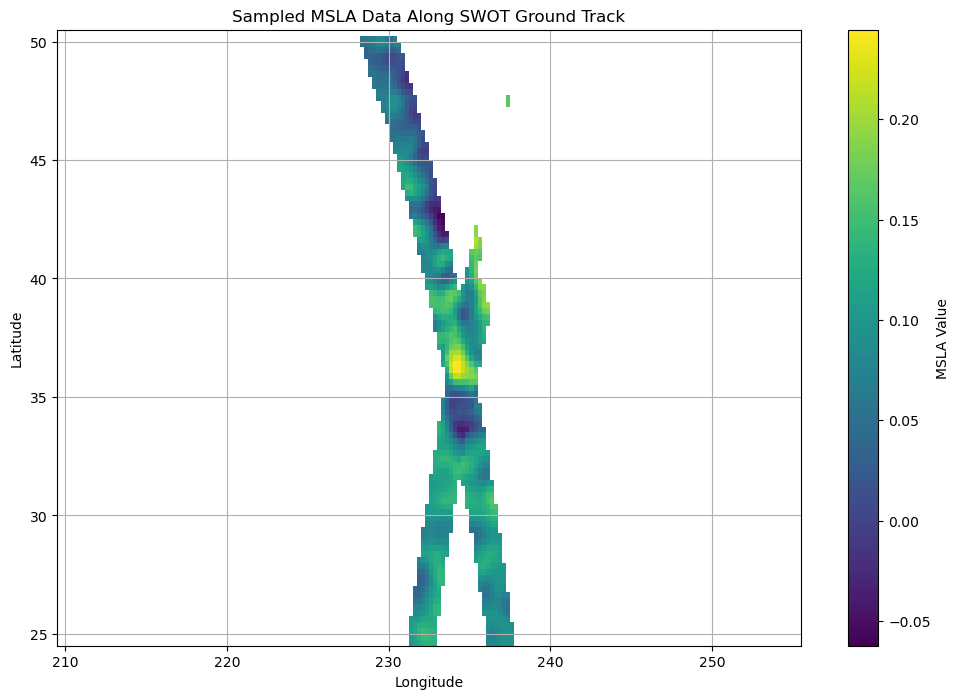

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def sample_msla_on_swot_track(msla, swot_longitude, swot_latitude):
    
    # Ensure the msla data's coordinates are in ascending order
    msla = msla.sortby('x').sortby('y')
    
    # Extract the lon and lat coordinates
    lon_coords = lon.values
    lat_coords = lat.values
    
    # Ensure SWOT data is within bounds of msla
    valid_points = (swot_latitude >= lat_coords[0]) & (swot_latitude <= lat_coords[-1]) & \
                   (swot_longitude >= lon_coords[0]) & (swot_longitude <= lon_coords[-1])
    swot_latitude = swot_latitude[valid_points]
    swot_longitude = swot_longitude[valid_points]
    
    # Use the RegularGridInterpolator to create an interpolator object
    interpolator = RegularGridInterpolator((lat_coords, lon_coords), msla.values)
    
    # Stack the SWOT longitude and latitude data to get an array of points to sample
    points_to_sample = np.vstack((swot_latitude.ravel(), swot_longitude.ravel())).T
    sampled_values_for_swot = interpolator(points_to_sample)

    # Initialize a new array with NaNs with the shape of the original aviso dataset
    sampled_values = np.full(msla.shape, np.nan)

    # Convert SWOT coordinates to indices in the aviso grid
    lat_indices = np.digitize(swot_latitude, lat_coords) - 1
    lon_indices = np.digitize(swot_longitude, lon_coords) - 1

    # Assign the interpolated values to the new array at the SWOT positions
    sampled_values[lat_indices, lon_indices] = sampled_values_for_swot

    # Plotting on a 2D map
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(lon_coords, lat_coords, sampled_values, cmap='viridis')
    plt.colorbar(label='MSLA Value')
    plt.title('Sampled MSLA Data Along SWOT Ground Track')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

    return lat_indices, lon_indices, sampled_values

# Test the function with your data
swot_longitude = longitude
swot_latitude = latitude

sampled_aviso_grid = sample_msla_on_swot_track(aviso_ssh, swot_longitude, swot_latitude)


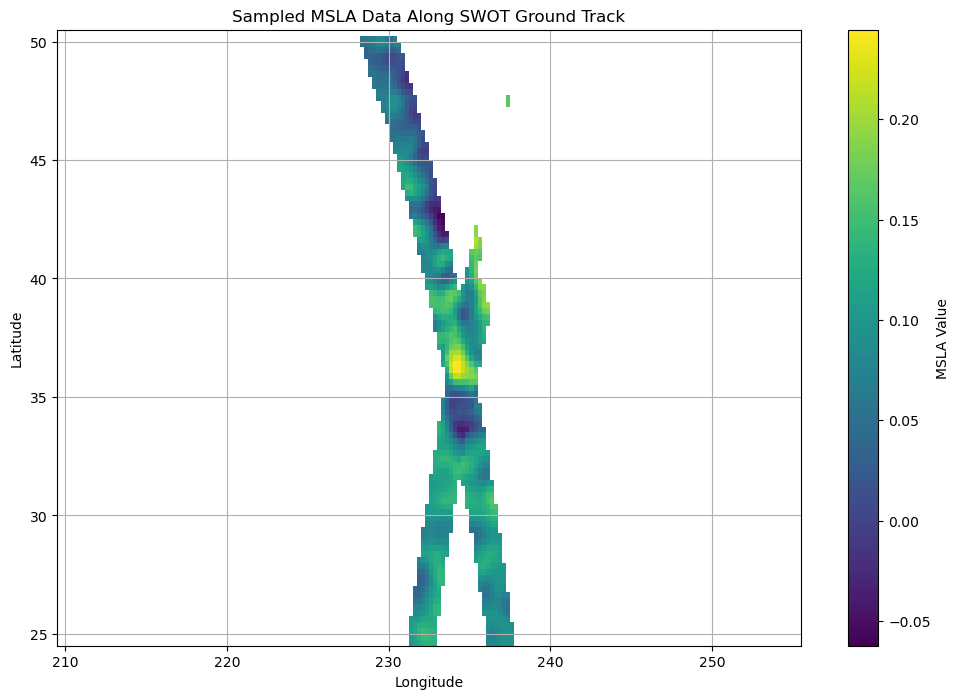

In [20]:
swot_longitude = longitude
swot_latitude = latitude
# xy, sampled_values = sample_msla_on_swot_track(aviso_ssh, lon, lat, swot_longitude, swot_latitude)
lat_indices, lon_indices, sampled_values = sample_msla_on_swot_track(aviso_ssh, swot_longitude, swot_latitude)

In [ ]:
# Create the map plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is one of the simplest projections for geographic data.

# Set extent for the California Current region
# ax.set_extent([-155, -135, 30, 40])
plt.pcolormesh(aviso_ds.lon[lon_indices], aviso_ds.lat[lat_indices],  aviso_ssh)
plt.scatter(aviso_longitude, aviso_latitude)
ax.coastlines(resolution='50m')  # '10m', '50m', and '110m' are the options for resolution. '10m' is the highest.
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.gridlines(draw_labels=True)
plt.title('Sampled MSLA Data Along SWOT Ground Track')

plt.show()
